In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import csv
!pip install lmfit
import lmfit as lm

     |████████████████████████████████| 292 kB 7.6 MB/s 
     |████████████████████████████████| 98 kB 8.5 MB/s 
  Created wheel for lmfit: filename=lmfit-1.0.3-py3-none-any.whl size=84401 sha256=162d1a82aac48ed57f2d9d989ea28af505614d9f928c8279bb8ac920d7ad22b5
  Stored in directory: /root/.cache/pip/wheels/b9/7a/d1/236aa0f8196b264fda481a112f7cfb1bfde7bfb20235f8e331
  Created wheel for asteval: filename=asteval-0.9.25-py3-none-any.whl size=17301 sha256=40c06fb695f9bda7c998ce511603037f83b78b92d3952da6ec0b6894b6d99e07
  Stored in directory: /root/.cache/pip/wheels/4a/87/53/f1385a55b3f60eabb921c5f4fd151c00fdb016b5111b8c830f
Successfully built lmfit asteval


In [2]:
uploaded = files.upload()

Saving Total_Angle_data.csv to Total_Angle_data.csv


In [3]:
with open("Total_Angle_data.csv", 'r') as csvfile:
  data = np.array(list(csv.reader(csvfile, delimiter=",")))

In [4]:
df = pd.DataFrame(data, columns = ('n', 'A', 'B', 'Apr', 'Bpr'))

count = 0
a = []
b = []
ap = []
bp = []
for row in df.itertuples():
  if count%6 != 0:
    a.append(row.A)
    b.append(row.B[1:])
    ap.append(row.Apr[1:])
    bp.append(row.Bpr[1:])
  count = count + 1

alist = [float(x) for x in a]
blist = [float(x) for x in b]
aprlist = [float(x) for x in ap]
bprlist = [float(x) for x in bp]
dfnew = pd.DataFrame()
dfnew.insert(0, 'a', alist)
dfnew.insert(1, 'b', blist)
dfnew.insert(2, 'a~', aprlist)
dfnew.insert(3, 'b~', bprlist)

In [5]:
dfnew[0:5]

,a,b,a~,b~
0,33178.0,46447.0,347324.0,495722.0
1,32957.0,46668.0,348152.0,495329.0
2,33115.0,46625.0,347654.0,496132.0
3,33453.0,46841.0,348309.0,494412.0
4,33275.0,46974.0,347663.0,495811.0


In [6]:
angles = [0, 20, 40, 60, 80, 120, 160, 200, 240, 280, 320, 360]

In [7]:
indexes = []
index = 0
z = 0
for i in angles:
  for k in range(0, 5, 1):
    indexes.append(i)

In [8]:
dfnew.insert(0, 'angle', indexes)

In [9]:
finals = []
for angle in angles:
  amean = np.mean(dfnew[dfnew['angle']==angle]['a'].values)
  bmean = np.mean(dfnew[dfnew['angle']==angle]['b'].values)
  apmean = np.mean(dfnew[dfnew['angle']==angle]['a~'].values)
  bpmean = np.mean(dfnew[dfnew['angle']==angle]['b~'].values)
  finals.append((angle, amean, bmean, apmean, bpmean))

In [10]:
finaldf = pd.DataFrame(finals, columns = ('angle', 'a', 'b', 'a~', 'b~'))
finaldf

,angle,a,b,a~,b~
0,0,33195.6,46711.0,347820.4,495481.2
1,20,35640.6,71032.0,343601.0,464954.6
2,40,141563.6,176642.0,257247.6,374776.4
3,60,280941.8,342600.8,147517.0,226294.8
4,80,398805.4,492818.6,59094.4,91229.4
5,120,360325.2,458026.0,75772.0,124755.2
6,160,119041.0,148531.6,274919.6,404983.4
7,200,38256.2,63397.6,340166.8,478044.4
8,240,265553.4,352038.2,156963.4,221200.4
9,280,424109.4,537542.8,29272.0,53717.2


In [27]:
thetas = finaldf['angle'].values * np.pi / 180
Iout = finaldf['b'].values

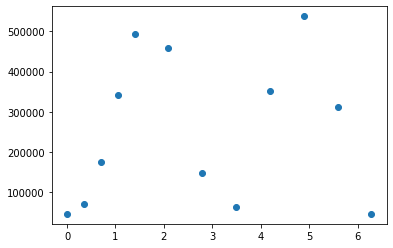

In [28]:
plt.scatter(thetas, Iout)

In [29]:
def fwdfn(xlist, **params):
  th0 = params['theta0']
  a = params['amp']
  y = params['shift']
  final = a * (np.sin(xlist-th0)**2) + y
  return final

import lmfit as lm
model = lm.Model(fwdfn, independent_vars=['xlist'])
params = lm.Parameters()

params.add(f'theta0', value=0, vary=True)
params.add(f'amp', value=1, vary=True)
params.add(f'shift', value=0, vary=True)

samples = Iout
resultfit = model.fit(samples, xlist=thetas, params=params)

In [30]:
resultfit

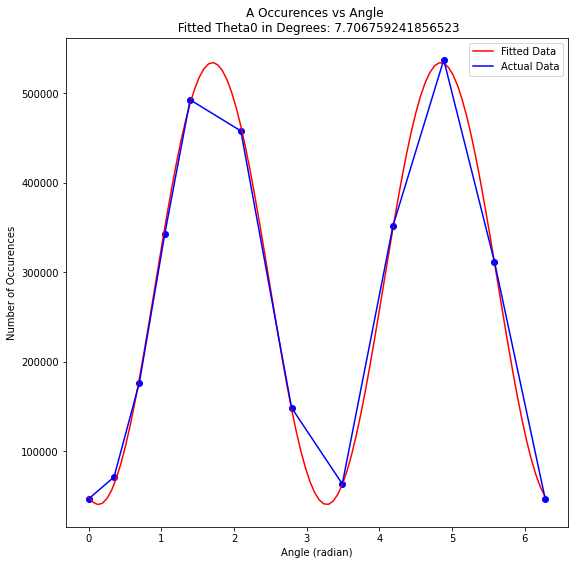

In [32]:
fittedval = resultfit.params['amp'].value * (np.sin(thetas-resultfit.params['theta0'].value)**2) + resultfit.params['shift'].value

xs = np.linspace(0, 2*np.pi, 100)
ys = resultfit.params['amp'].value * (np.sin(xs-resultfit.params['theta0'].value)**2) + resultfit.params['shift'].value

fig = plt.figure(figsize=(9, 9))
plt.scatter(thetas, Iout, c='blue')
plt.plot(xs, ys, c='red', label='Fitted Data')
plt.plot(thetas, Iout, c='blue', label='Actual Data')
plt.xlabel('Angle (radian)')
plt.ylabel('Number of Occurences')
theta0p = (resultfit.params['theta0'].value) * (180/np.pi)
plt.title(f'A Occurences vs Angle \n Fitted Theta0 in Degrees: {theta0p}')
plt.legend()

In [ ]:
#Shift half wave plate in order to maximize A and B and minimize A' and B'
#Record other half wave plate angle value and record outcoming intensities in 10 second intervals
#Shift half wave plate to collect 8 data points over one period (360 degrees)

In [ ]:
A = 7.9442339
B = 8.25832


In [ ]:
#Get theta a, a', b, b' --- round it to the one's digit
#Get angles for the 45˚ orientations -- round also to the one's digit ==> because half wave plate has 4 degree increments
#


In [ ]:
uploaded = files.upload()

Saving Total_Data - Sheet1.csv to Total_Data - Sheet1.csv


In [ ]:
with open("Total_Data - Sheet1.csv", 'r') as csvfile:
  data = np.array(list(csv.reader(csvfile, delimiter=",")))

In [ ]:
df = pd.DataFrame(data[1:], columns=('alpha', 'beta', 'run', 'A', 'A~', 'B', 'B~', 'AB', 'AB~', 'A~B', 'A~B~'))
df['A'] = df['A'].values.astype(float)
df['A~'] = df['A~'].values.astype(float)
df['B'] = df['B'].values.astype(float)
df['B~'] = df['B~'].values.astype(float)
df['AB'] = df['AB'].values.astype(float)
df['AB~'] = df['AB~'].values.astype(float)
df['A~B'] = df['A~B'].values.astype(float)
df['A~B~'] = df['A~B~'].values.astype(float)
df['alpha'] = df['alpha'].values.astype(float)
df['beta'] = df['beta'].values.astype(float)

In [ ]:
df

,alpha,beta,run,A,A~,B,B~,AB,AB~,A~B,A~B~
0,45.0,22.5,1,211553.0,102679.0,169069.0,392261.0,347.0,917.0,346.0,1320.0
1,45.0,22.5,1,211532.0,101733.0,169444.0,391949.0,339.0,906.0,347.0,1280.0
2,45.0,22.5,1,212995.0,101524.0,169329.0,392431.0,303.0,943.0,376.0,1313.0
3,45.0,22.5,1,211105.0,101668.0,169412.0,390896.0,377.0,939.0,359.0,1347.0
4,45.0,22.5,1,211221.0,101641.0,169408.0,391187.0,297.0,927.0,352.0,1313.0
...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,-22.5,4,19779.0,99793.0,321071.0,398744.0,33.0,13.0,603.0,2844.0
156,0.0,-22.5,4,19977.0,99537.0,320052.0,398500.0,16.0,8.0,581.0,2874.0
157,0.0,-22.5,4,19769.0,99286.0,320413.0,398577.0,34.0,6.0,589.0,2876.0
158,0.0,-22.5,4,19830.0,100045.0,321346.0,398094.0,30.0,8.0,604.0,2663.0


In [ ]:
def calcE(NAB, NApBp, NABp, NApB):
  return (NAB + NApBp - NABp - NApB) / (NAB + NApBp + NABp + NApB)

In [ ]:
evals = calcE(df['AB'].values, df['A~B~'].values, df['AB~'].values, df['A~B'].values,)
df.insert(11, 'Eval', evals)

In [ ]:
Evals1 = df[(df['alpha']==45.0) & (df['beta']==22.5)]['Eval'].values
Evals2 = df[(df['alpha']==45.0) & (df['beta']==-22.5)]['Eval'].values
Evals3 = df[(df['alpha']==0) & (df['beta']==22.5)]['Eval'].values
Evals4 = df[(df['alpha']==0) & (df['beta']==-22.5)]['Eval'].values

In [ ]:
Svals = Evals1 - Evals2 + Evals3 + Evals4
Svals

array([1.28656351, 1.24045058, 1.23960483, 1.25269926, 1.19461484,
       1.23431886, 1.27416829, 1.25236575, 1.20923433, 1.28123683,
       1.23749834, 1.19906689, 1.30736778, 1.28473697, 1.22524241,
       1.24092474, 1.27307295, 1.21710549, 1.25091903, 1.27932224,
       1.22196987, 1.21757774, 1.22566121, 1.19997845, 1.25498254,
       1.24235086, 1.2248942 , 1.25458677, 1.27186343, 1.19694927,
       1.22850383, 1.20289102, 1.21575884, 1.24549271, 1.22948628,
       1.1637081 , 1.24413106, 1.21195091, 1.20172204, 1.20509278])

In [ ]:
smean = np.mean(Svals)
sstd = np.std(Svals)

Text(0.5, 1.0, 'Histogram of S Values \n S mean = 1.236, S std = 0.0305')

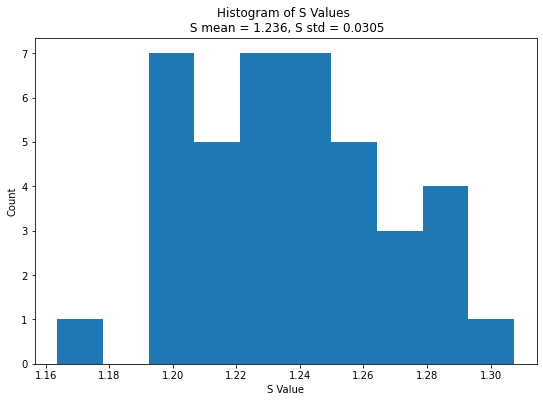

In [ ]:
fig = plt.figure(figsize = (9, 6))
plt.hist(Svals)
plt.xlabel('S Value')
plt.ylabel('Count')
plt.title(f'Histogram of S Values \n S mean = {np.round(smean, 4)}, S std = {np.round(sstd, 4)}')